<a href="https://colab.research.google.com/github/SaniyaBubere/ML_Regression_Retails_Sales_Prediction/blob/main/ML_Regression_Retails_sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Problem** **Description**
# Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
# You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [153]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORT MODULES

In [154]:
#importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

LOADING THE DATASETS

In [155]:
#loading Rossmann Data as df1
df1=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')

In [156]:
#loading Store Data as df2
df2=pd.read_csv('/content/drive/MyDrive/store.csv')

In [157]:
#1st 5 rows of df1
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [158]:
#1st 5 rows of df2
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [159]:
#Statistical Info
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


 There is No Null Values in Rossmann Dataset


In [160]:
#Statistical Info
df2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


There is Missing Values in Columns(Competition Distance ,Competition open since month,Competition open since year  ,Promo2 since week and Promo2 since year in Store Dataset

In [161]:
#datatype of attributes of Rossman Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [162]:
#datatype of attributes of Store Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [163]:
#check unique value in Rossman dataset
count=df1[['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']].nunique()
print("Unique value count:\n",count)

Unique value count:
 Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [164]:
#check unique value in Store dataset
count2=df2[['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].nunique()
print("Unique Values Count Fro Datase 2:\n",count2)

Unique Values Count Fro Datase 2:
 Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


In [165]:
#Checking Null Values in Rossman Dataset
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

* There is No Null Value in Rossman Dataset

In [166]:
#checking null value in Store Dataset
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

* There are Six Columns with Null Values/Missing Values are as follow:
* CompetitionDistance- distance in meters to the nearest competitor store

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened   
* CompetitionOpenSinceYear-  gives the approximate year of the time the nearest competitor was opened   
* Promo2SinceWeek, Promo2SinceYear and PromoInterval  

In [167]:
# Checking if any Duplicate values are present in the Rossman Dataset
df1.duplicated().sum()

0

There is No Duplicates in Rossman Dataset

In [168]:
# Checking if any Duplicate values are present in the Store Dataset
df2.duplicated().sum()

0

There is No Duplicates in Store Dataset

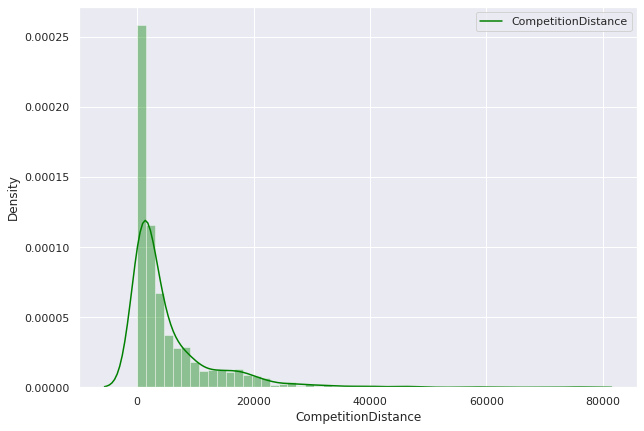

In [169]:
plt.figure(figsize=(10,7))
sns.distplot(df2['CompetitionDistance'],color = 'green')
plt.legend(['CompetitionDistance'])
plt.show()

From the above Plot we can see that the CompetitionDistance is Positively Skewed

In [170]:
#checking mean 
Checking_Mean=df2['CompetitionDistance'].mean()
Checking_Mean 

5404.901079136691

In [171]:
#checking median
Checking_Median=df2['CompetitionDistance'].median()
Checking_Median

2325.0

In [172]:
#checking mode
Checking_Mode=df2['CompetitionDistance'].mode()
Checking_Mode

0    250.0
dtype: float64

In [173]:
#Filling Nan Values With Median 
df2['CompetitionDistance'].fillna(Checking_Median,inplace=True)
#Checking that Nan Value is Replaced or Not
df2['CompetitionDistance'].isnull().value_counts()

False    1115
Name: CompetitionDistance, dtype: int64

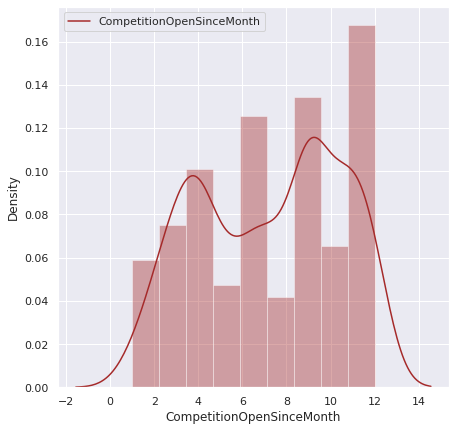

In [174]:
plt.figure(figsize=(7,7))
sns.distplot(df2['CompetitionOpenSinceMonth'],color = 'brown')
plt.legend(['CompetitionOpenSinceMonth'])
plt.show()

From the Above Plot We Can Say That The CompetitionOpenSinceMonth is Left Skewed





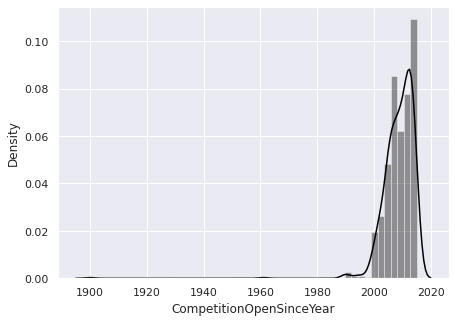

In [175]:
plt.figure(figsize=(7,5))
sns.distplot(df2['CompetitionOpenSinceYear'],color='black')
plt.show()

From the Above Plot We Can Say That The CompetitionOpenSinceYear is Left Skewed


In [176]:
#Checking Means
mean_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mean()
mean_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       7.224704
CompetitionOpenSinceYear     2008.668857
dtype: float64

In [177]:
#Checking Median
median_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].median()
median_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       8.0
CompetitionOpenSinceYear     2010.0
dtype: float64

In [178]:
#Checking Mode
Mode_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mode()
Mode_CompetitionOpenSinceMonth_Year

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,9.0,2013.0


In [179]:
#Replacing the Null values with suitable value
df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

In [180]:
#Replacing the Null Values with suitable value
df2['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [181]:
## Replacing the Null values with suitable value
df2[['Promo2SinceWeek','Promo2SinceYear']]=df2[['Promo2SinceWeek','Promo2SinceYear']].replace(np.nan,0)

In [182]:
# replacing nan with string 0
df2['PromoInterval']=df2['PromoInterval'].replace(np.nan,"0")

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [183]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Hurreyy Now We Don't have any Null Value in Our Dataset

Merging Both DataSets

In [184]:
#merging both dataset
df=df1.merge(df2)

In [185]:
#checking merge df
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [186]:
#checking null values in merged df
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [187]:
#Checking Unique Value of all Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

# Understanding Variables

In [188]:
print(df.Store.min())
print(df.Store.max())

1
1115


In [189]:
print(df.DayOfWeek.min())
print(df.DayOfWeek.max())

1
7


In [190]:
print(df.Date.min())
print(df.Date.max())

2013-01-01
2015-07-31


In [191]:
print(df.Sales.min())
print(df.Sales.max())

0
41551


In [192]:
print(df.Customers.min())
print(df.Customers.max())

0
7388


In [193]:
print(df.Open.min())
print(df.Open.max())

0
1


In [194]:
print(df.Promo.min())
print(df.Promo.max())

0
1


In [195]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [196]:
df.SchoolHoliday.unique()

array([1, 0])

In [197]:
df.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [198]:
df.sort_values(by=['StoreType'],inplace=True)

In [199]:
df.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [200]:
df.sort_values(by=['Assortment'],inplace=True)

In [201]:
print(df.CompetitionDistance.min())
print(df.CompetitionDistance.max())

20.0
75860.0


In [202]:
print(df.CompetitionOpenSinceMonth.min())
print(df.CompetitionOpenSinceMonth.max())

1.0
12.0


In [203]:
print(df.CompetitionOpenSinceYear.min())
print(df.CompetitionOpenSinceYear.max())

1900.0
2015.0


In [204]:
df.Promo2.unique()

array([0, 1])

In [205]:
print(df.Promo2SinceWeek.min())
print(df.Promo2SinceWeek.max())

0.0
50.0


In [206]:
df.Promo2SinceYear.unique()

array([   0., 2013., 2011., 2014., 2015., 2010., 2012., 2009.])

In [207]:
df.PromoInterval.unique()

array(['0', 'Mar,Jun,Sept,Dec', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov'],
      dtype=object)

# **Exploratory Data Analysis**

In [208]:
#replacing
df['StateHoliday']=df['StateHoliday'].replace(['0'],0)

0 is in String formate so we have to replace it with int dtype

In [209]:
df["StateHoliday"].replace({"a": 1, "b": 1,"c":1}, inplace=True)

In [210]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
508604,558,2,2013-10-15,2491,416,1,0,0,0,a,a,3000.0,2.0,2010.0,0,0.0,0.0,0
267131,295,5,2015-04-03,0,0,0,1,1,1,a,a,210.0,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec"
267132,295,4,2015-04-02,6130,663,1,1,0,1,a,a,210.0,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec"
267133,295,3,2015-04-01,8070,888,1,1,0,1,a,a,210.0,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec"
267134,295,2,2015-03-31,6858,786,1,1,0,1,a,a,210.0,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec"


We Can See the Open Vs Close 
Open Have Higher Values

# **Univariant**

# Distribution of diffrent StoreType

# Counting each columns 

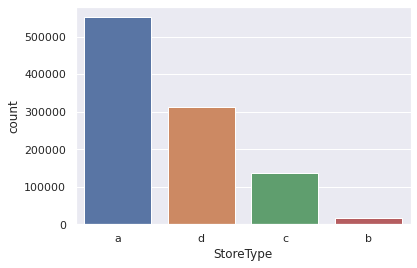

In [211]:
sns.countplot(df['StoreType'])

As Bar plots are commonly used to compare the values of different categories of data

No of Store type a has highest count followed by by type d and then c. b type store has lowest count.

We can comare the profitabily in percentage with the investment as well as with respect to store count. as much as profit more we can prefer to that types of stores.

# Distribution of Assortment Type and Average sales

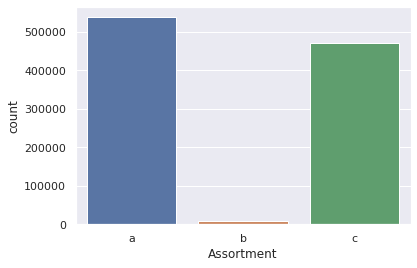

In [212]:
sns.countplot(df['Assortment'])

As Bar plots are commonly used to compare the values of different categories of
data

Distribution of Assortment Type a has highest count and Distribution of Assortment Type b has lowet count

depending upon the demand and performance of assort type we can take desions

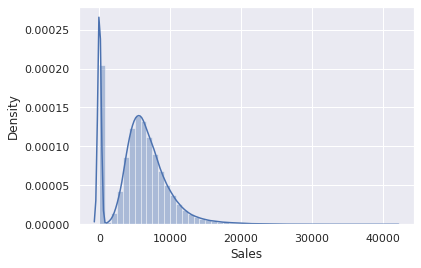

In [213]:
# Distribution of dependent variable
sns.distplot(df['Sales'])

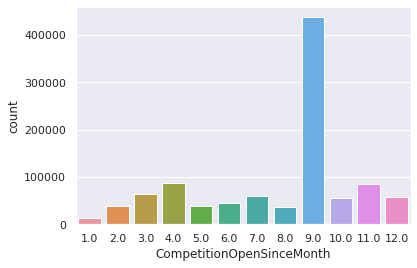

In [214]:
sns.countplot(df['CompetitionOpenSinceMonth'])

Highest Competition Open Since September

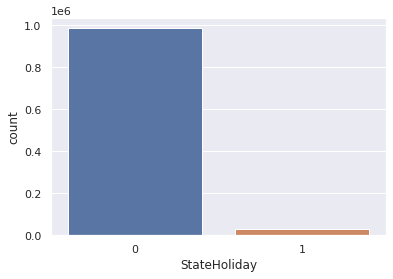

In [215]:
sns.countplot(df['StateHoliday'])

 a = public holiday, b = Easter holiday, c = Christmas, 0 = None.
 As Per Obeservation all Stores are open on StateHolidays except few.

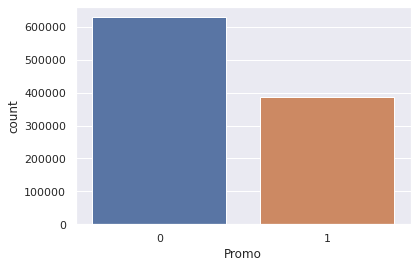

In [216]:
sns.countplot(df['Promo'])


Promo - indicates whethere a store is running a promo on that day 0 is for No 1 is for Yes
As per observation Store is not Running much on a day because 0 have higher value as compare to 1

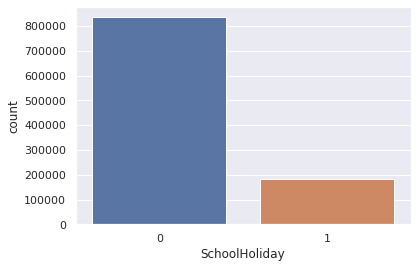

In [217]:
sns.countplot(df['SchoolHoliday'])

From this Observation we can say that most of the Store are Closed on School Holiday

# **Bivariant**

In [218]:
from datetime import datetime

In [219]:
# Converting Date date column to datetime type
df['Date'] = df['Date'].apply((lambda x: datetime.strptime(x,"%Y-%m-%d")))

In [220]:
# extracting month,year and week of year from date 
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df['WeekOfYear']=df.Date.dt.isocalendar().week

In [221]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,WeekOfYear
508604,558,2,2013-10-15,2491,416,1,0,0,0,a,...,3000.0,2.0,2010.0,0,0.0,0.0,0,10,2013,42
267131,295,5,2015-04-03,0,0,0,1,1,1,a,...,210.0,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",4,2015,14
267132,295,4,2015-04-02,6130,663,1,1,0,1,a,...,210.0,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",4,2015,14
267133,295,3,2015-04-01,8070,888,1,1,0,1,a,...,210.0,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",4,2015,14
267134,295,2,2015-03-31,6858,786,1,1,0,1,a,...,210.0,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",3,2015,14


# **What is the Sales Corresponds to Years?**

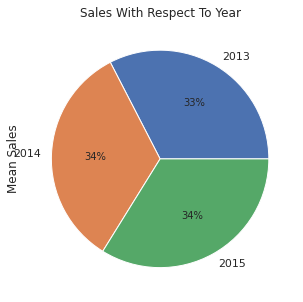

In [222]:
# year wise contribution in sales
dfg = df.groupby(['Year'])['Sales'].mean()

dfg.plot(kind='pie', title='Sales With Respect To Year', ylabel='Mean Sales',
xlabel='Year', figsize=(6, 5), autopct='%.0f%%')



As Per the Graph Maximum Sales occure in 2015  & 2014

# **Promotion w.r.t Sales**

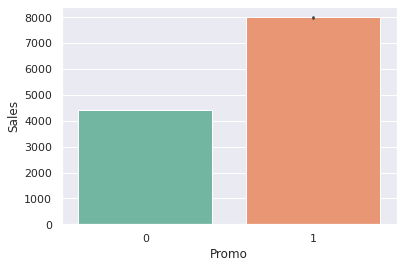

In [223]:
# Promos Sales relationship
promo_sales = sns.barplot(x="Promo", y="Sales", data=df, palette="Set2")

 Those store who took promotions their sales are high as compared to stores who didnt took promotion.



#Average Sales Per Store

Text(0.5, 1.0, 'Boxplot For Sales Values with respect to Store Type')

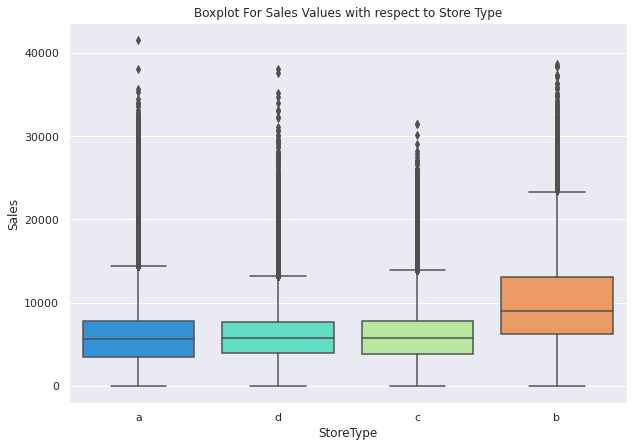

In [224]:
#Average Sales Per Store
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="StoreType", y="Sales", data=df,palette='rainbow')
plt.title('Boxplot For Sales Values with respect to Store Type')

We can observe that Store type 'b' have more sales then other three

Text(0.5, 1.0, 'Boxplot for the effect of Assortment Type on sales')

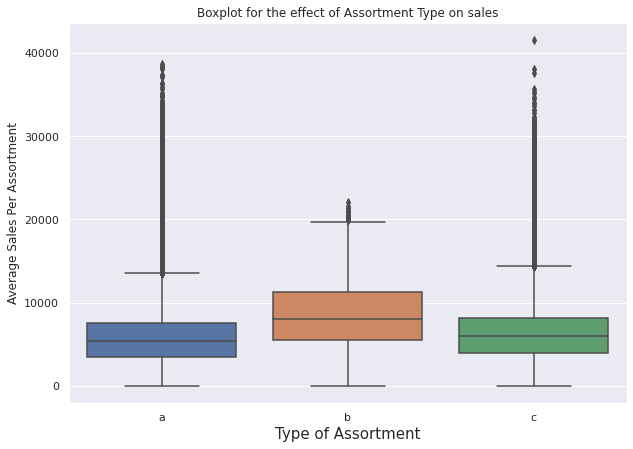

In [225]:
# Assortment type base on sales
plt.figure(figsize=(10,7))
sns.boxplot(x="Assortment",y="Sales",data=df)
plt.xlabel("Type of Assortment",size=15)
plt.ylabel("Average Sales Per Assortment")
plt.title("Boxplot for the effect of Assortment Type on sales")



Use:BoxPlot and whisker plots, are a great chart to use when showing the distribution of data points across a selected measure

Insight:We can observe that Assortment b have more no. of sales then other 2

# **Open And Close Relation on the basis of Weeks**

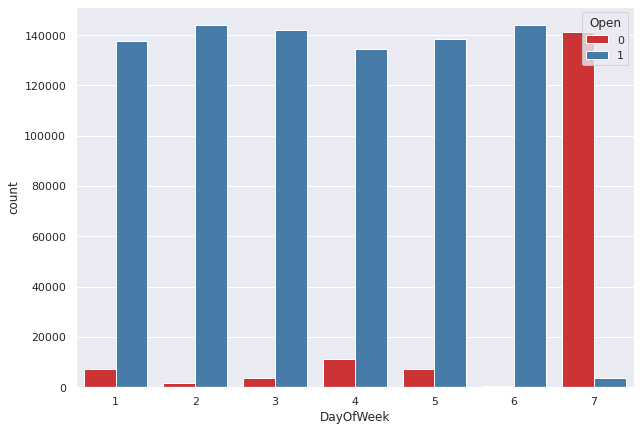

In [226]:
#Open_DayOfWeek
sns.countplot( x='DayOfWeek', data=df, hue="Open", palette="Set1");

### Almost all the stores are closed at the weekend

# **Which day of the week has maximum sales?**

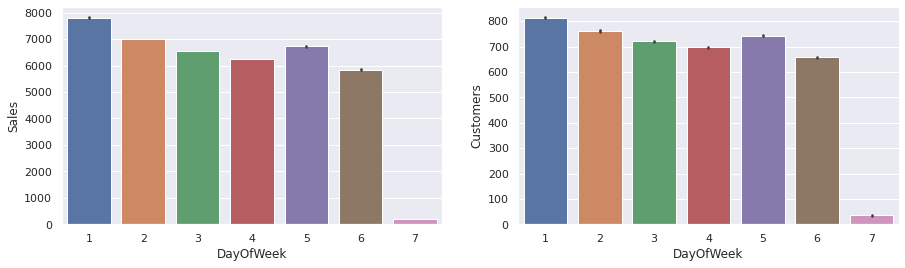

In [227]:
# DayOfWeek with respect to Sales & Customers 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=df, order=[1,2,3,4,5,6,7], ax=axis2)

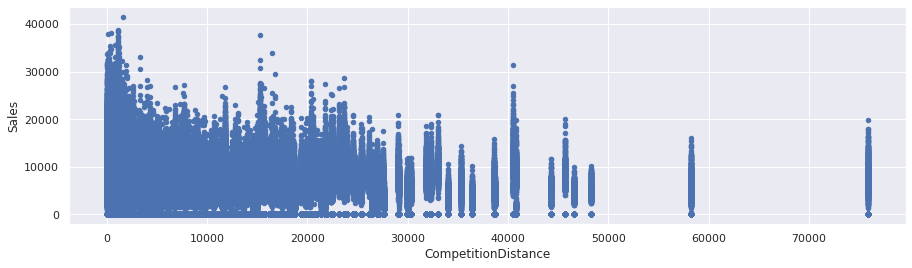

In [228]:
# Sales w.r.t Competition Distance
df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))


There are not more sales more then 2000 and most store have 0 sales a day 

# Day of Day Comparision

In [229]:
# Day of day columns
var=df[['Date','Sales']]


In [230]:
var.head()

,Date,Sales
508604,2013-10-15,2491
267131,2015-04-03,0
267132,2015-04-02,6130
267133,2015-04-01,8070
267134,2015-03-31,6858


In [231]:
# difference of day of day
var['Difference']=var['Sales'].diff(1)

In [232]:
var.head()

,Date,Sales,Difference
508604,2013-10-15,2491,NaN
267131,2015-04-03,0,-2491.0
267132,2015-04-02,6130,6130.0
267133,2015-04-01,8070,1940.0
267134,2015-03-31,6858,-1212.0


In [233]:
# day of day w.r.t diff and year
var['Year']=var['Date'].dt.year

In [234]:
var.head()

,Date,Sales,Difference,Year
508604,2013-10-15,2491,NaN,2013
267131,2015-04-03,0,-2491.0,2015
267132,2015-04-02,6130,6130.0,2015
267133,2015-04-01,8070,1940.0,2015
267134,2015-03-31,6858,-1212.0,2015


# YOY SALES

In [235]:
var=var.groupby('Year')['Sales'].sum()

In [236]:
# three years total 
var=var.reset_index()
var.head()

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


In [237]:
# three years sales diffrence
var['difference']=var['Sales'].diff(1)

In [238]:
var.head()

,Year,Sales,difference
0,2013,2302876084,NaN
1,2014,2180804896,-122071188.0
2,2015,1389499643,-791305253.0


In [239]:
# Yoy % diff
var['YoY percentage diff']=round(var['difference']/var['Sales']*100,2)
var

,Year,Sales,difference,YoY percentage diff
0,2013,2302876084,NaN,NaN
1,2014,2180804896,-122071188.0,-5.60
2,2015,1389499643,-791305253.0,-56.95


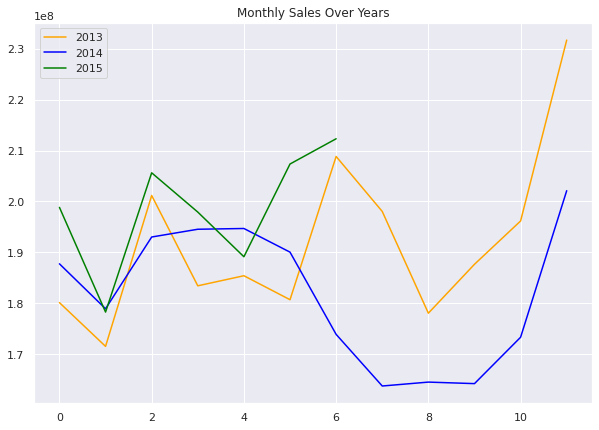

In [240]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()


#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

# **MoM** **Comparision with Sales**

# **Monthly Sales Average**

In [241]:
monthly=df[['Date','Sales']]
#monthly.head()
monthly['Diffrence']=monthly['Sales'].diff(1)
#monthly.head()
#monthly.dtypes
monthly['Month']=monthly['Date'].dt.month
#monthly.head()
monthly=monthly.groupby('Month')['Sales'].mean()
monthly=monthly.reset_index()
monthly['difference']=monthly['Sales'].diff(1)
monthly['MoM percentage diff']=round(monthly['difference']/monthly['Sales']*100,2)
monthly

,Month,Sales,difference,MoM percentage diff
0,1,5465.395529,NaN,NaN
1,2,5645.253150,179.857621,3.19
2,3,5784.578871,139.325721,2.41
3,4,5738.866916,-45.711955,-0.80
4,5,5489.639973,-249.226943,-4.54
5,6,5760.964375,271.324402,4.71
6,7,6064.915711,303.951336,5.01
7,8,5693.016554,-371.899157,-6.53
8,9,5570.246033,-122.770521,-2.20
9,10,5537.037419,-33.208613,-0.60


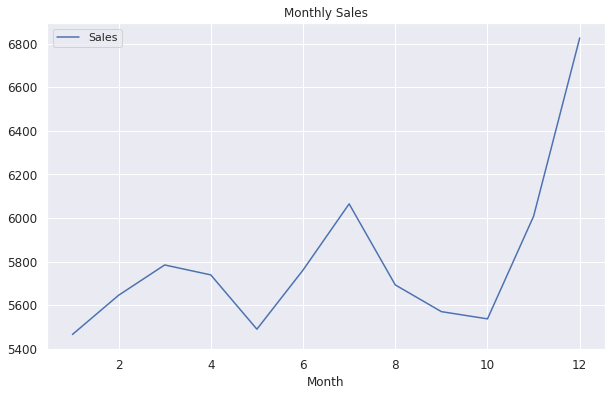

In [242]:
# monthly diffrence
df[['Month','Sales']].groupby('Month').mean().plot(figsize=(10,6),fontsize=12,title='Monthly Sales')  #hist

[]

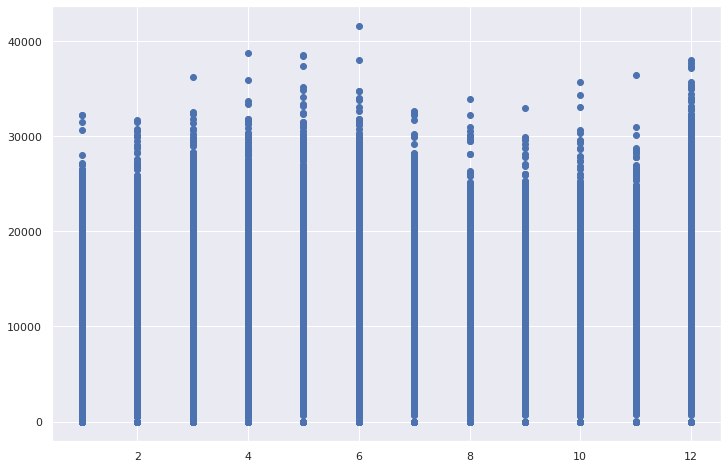

In [243]:
#Sales_Month
plt.figure(figsize=(12, 8))
plt.scatter(df["Month"],df["Sales"])
plt.plot()

# **Each Store Type Customers and Sales**




In [244]:
# Sales,Customers and Storetype
Dual=df.groupby(by='StoreType')[['Sales','Customers']].mean()  #sum
Dual=pd.DataFrame(Dual)
Dual

,Sales,Customers
StoreType,,
a,5738.179710,659.034880
b,10058.837334,1987.720846
c,5723.629246,673.265894
d,5641.819243,501.434892


# **Week & Year wise Customers**

In [245]:
# week & year wise customers
def plotter(Parameter , Parameter2):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(15, 10)
  sns.barplot(x=Parameter, y=Parameter2, data=df ,hue="DayOfWeek", ax = axes[0])
  sns.boxplot(x=Parameter, y=Parameter2, data=df ,hue="DayOfWeek", ax=axes[1])

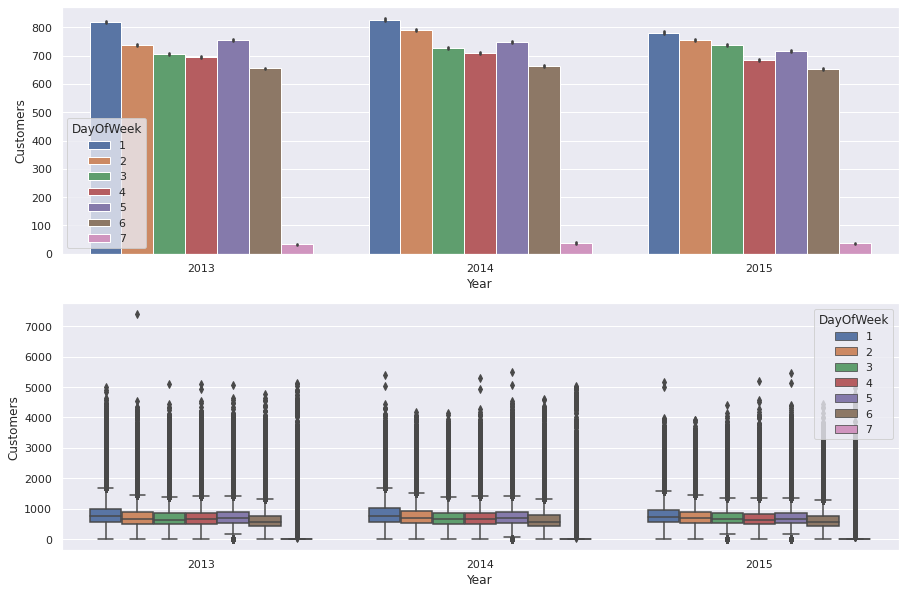

In [246]:
plotter('Year',"Customers")

# **Impact of School Holiday on Sales**

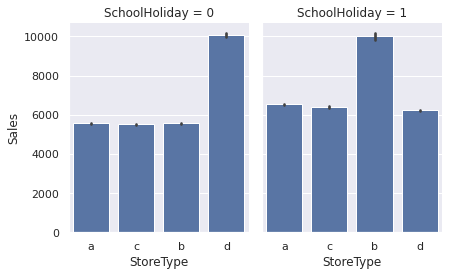

In [247]:
g = sns.FacetGrid(df, col="SchoolHoliday", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales");

Chart:Bar chart-present data in a visual form so that the reader may readily recognize patterns

Insight:We can say that Storetype 'd' have more Sale when Schools are closed and when School are open it have less sales as compared on holiday
And vise versa for store type'b', type c & d doesn't effect much like 'b' and 'c'

Impact : For Profitable Business We can have more Sales when Schools are open 

# **Impact of Sales w.r.t Promo , Assortments & StoreType**

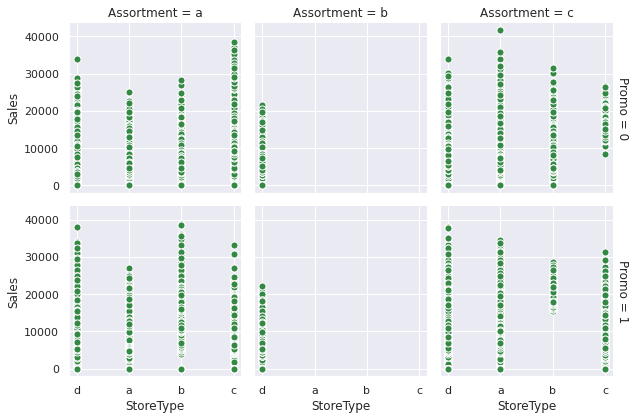

In [248]:
g = sns.FacetGrid(df, col="Assortment", row="Promo", margin_titles=True, height=3)
g.map(plt.scatter,  "StoreType","Sales", color="#338844", edgecolor="white", s=50, lw=1)
# g.set(xlim=(0, 50), ylim=(0, 100));

Use :FacetGrid Chart helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

Insights:
**ASSORTMENT "A"**:We can observe that Store type 'a' have more Sales then they apply promo and with basic assortment i.e 'a'

Same for Store type 'b' & 'c'

Store type 'd' have almost same sales with or without promo of assorment type 'a'

**ASSORTMENT "B"**:On assortment type 'b' i.e entented it have sales only for Store 'a' and that too same sales with or without promo

**ASSORTMENT "C"**:We can observes that Store 'a','b' & 'd' have more sales without promo
and 'c' have same sales with or without

Impact:We can have more sales with promo on basic assortment ,on extended type we have highers sales when one day promo is not applied and we dnt have any benifit for extra  type i.e assortment 'b'

# **Week wise Sales on the basis of Assortment and Promotions**

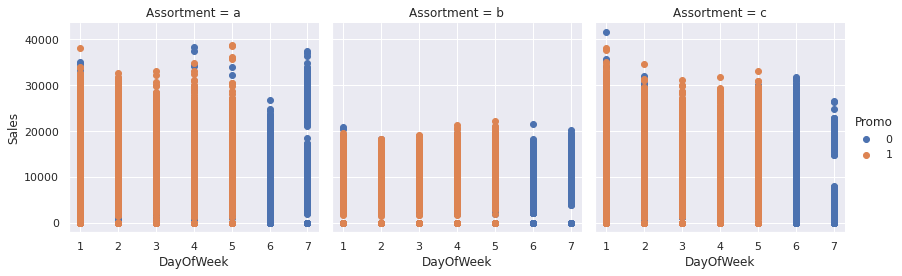

In [249]:
g = sns.FacetGrid(df, hue="Promo", col="Assortment", height=4)
g.map(plt.scatter,"DayOfWeek","Sales")
g.add_legend();


Chart:FacetGrid Charts in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

Insights:As we done before Same insight but on Store type now will do on Week Day here 1 means Monday and 7 means Sunday 

As per graph Assortment=a have more say on monday ,thursday,friday and sunday 
when we apply promo on monday we have more sale then without promo same for Friday and We Sales on Thurday,Saturday and Sunday without promo applied 

Same for Assortment b and c

Impact :As compared to 3 of assortment we have more sales on assortment type 'a'then 'c' and lastly 'b'

# **Long Promotion w.r.t Week of Store type and its Sales**

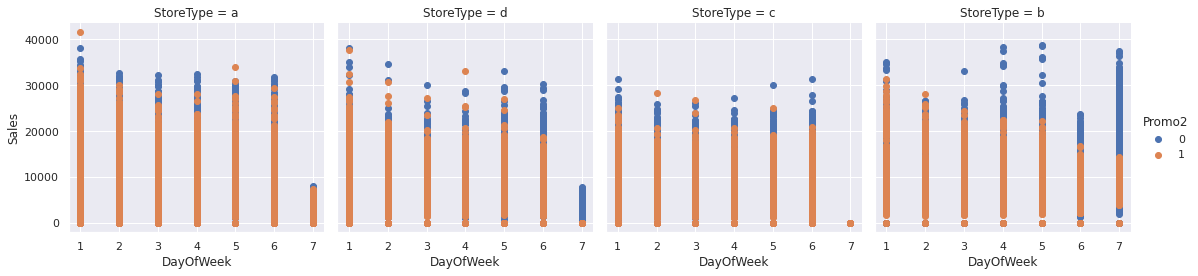

In [250]:
g = sns.FacetGrid(df, hue="Promo2", col="StoreType", height=4)
g.map(plt.scatter,"DayOfWeek","Sales")
g.add_legend();

Chart:FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

Insight:Store type 'a' have more Sales on Monday then b,c & d with Long Promo applied 

Store 'b' have more Sales on Thursday & Friday then a,c,d Without Promo2

Store 'c' have more sales on Monday and Saturday without Promo2

Store 'd have more Sales on Monday without Promo2

Impact:there is Very much Less Sales on Sunday As compared to other Days


# **Correlation Matrixs**

In [251]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year']
corr_df = df.drop(columns = columns_to_drop, axis =1)

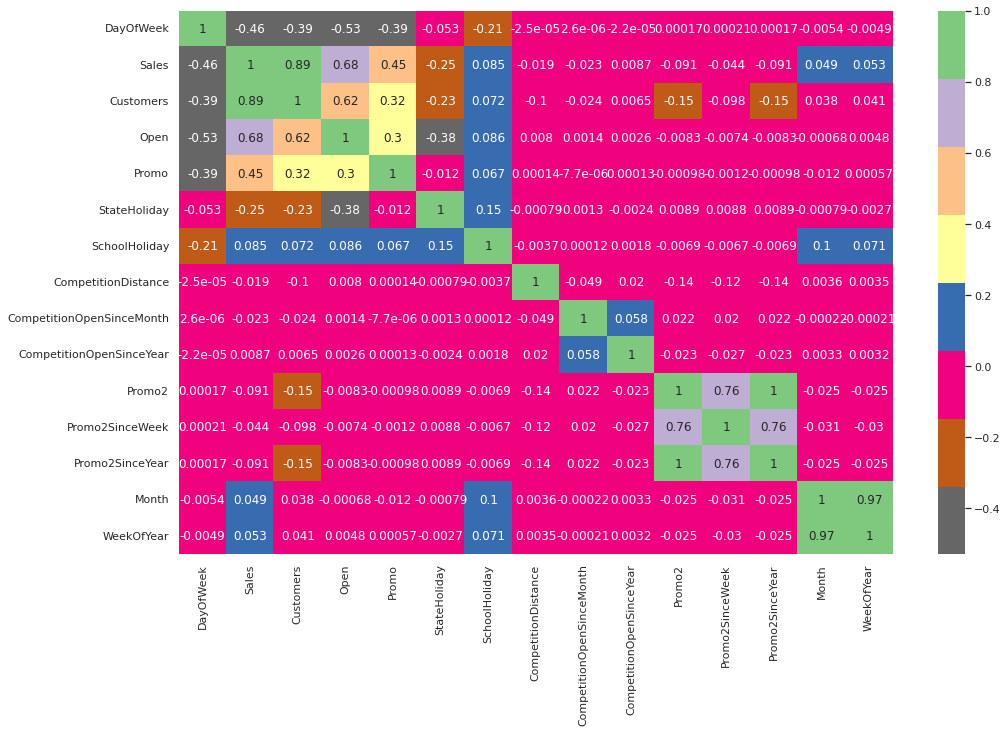

In [252]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap='Accent_r', annot=True)

EDA Conclusion:

1) No. of Store type 'a' has highest count followed by type 'd' ,'c' & 'b' type 'b' store have lowest count.

2)Distribution of Assortment Type 'a' has highest count and Distribution of Assortment Type 'b' has lower count

3) Almost all the stores are closed at the weekend

4) As in month of September Most Competition Opened

5) From the data we observed that higher the count of store who not run promo

6) From this Observation we can say that most of the Store are Closed on School Holiday

7) We can observe that Assortment b have more no. of sales then other 2

8) As Per the Graph Maximum Sales occur in 2015 & 2014

9) hose store who took promotions their sales are high as compared to stores who didn't took promotion

10) We can see that Store type 'b' have higher sales among the all

11) from the data insights We can say that Storetype 'd' have more Sale when Schools are closed and when School are open it have less sales as compared on holiday And vise versa for store type b', type c & d doesn't effect much like 'b' and 'c'

12) We Can Say that on StateHoliday Most Stores have less Sales ,In the above Graph Store 'b' Sales have higher and highest Sales among the all and its self w.r.t Not StateHoliday

13) As per graph we apply promo on monday to thursday and then without promo for Friday Saturday and Sunday

14) Sales are highest on Monday And highest customers visited on monday . on Sunday lowest sales and customer visits.

15) From the correlation matrix we observed that sales & customers correlated with 0.89 , sales & store open correlated with 0.68 , sales & promo correlated with 0.32


# **Feature Engineering**

In [253]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)


In [254]:
 comp_months(df)

In [255]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,WeekOfYear,CompetitionOpen
508604,558,2,2013-10-15,2491,416,1,0,0,0,a,...,2.0,2010.0,0,0.0,0.0,0,10,2013,42,44.0
267131,295,5,2015-04-03,0,0,0,1,1,1,a,...,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",4,2015,14,173.0
267132,295,4,2015-04-02,6130,663,1,1,0,1,a,...,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",4,2015,14,173.0
267133,295,3,2015-04-01,8070,888,1,1,0,1,a,...,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",4,2015,14,173.0
267134,295,2,2015-03-31,6858,786,1,1,0,1,a,...,11.0,2000.0,1,36.0,2013.0,"Mar,Jun,Sept,Dec",3,2015,14,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568305,624,3,2015-07-08,6238,579,1,0,0,1,a,...,9.0,2011.0,0,0.0,0.0,0,7,2015,28,46.0
568296,624,5,2015-07-17,6619,626,1,1,0,1,a,...,9.0,2011.0,0,0.0,0.0,0,7,2015,29,46.0
568298,624,3,2015-07-15,6908,668,1,1,0,1,a,...,9.0,2011.0,0,0.0,0.0,0,7,2015,29,46.0
568671,624,1,2014-07-07,7194,713,1,0,0,1,a,...,9.0,2011.0,0,0.0,0.0,0,7,2014,28,34.0


In [256]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0)
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) 

In [257]:
promo_cols(df)

In [258]:
#Dropping unecessary columns
df.drop(['Promo2SinceYear','Promo2','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [259]:
# creating copy of the dataset
df=df.copy()


In [260]:
# Remove column 
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [261]:
# Selecting only that row which is open
df = df[df.Open == 1].copy()

In [262]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Month', 'Year', 'WeekOfYear', 'CompetitionOpen',
       'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [263]:
# independant variable
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance',
               'Month', 'Year',  'Promo2','PromoInterval'
              ]
# dependent variable
target_col = 'Sales'

In [264]:
# numeric columns
numeric_cols = ['Store',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2Open', 
               'Month', 'Year','WeekOfYear']

In [265]:
# Categorical columns
categorical_cols=['Promo','SchoolHoliday','StateHoliday','IsPromo2Month']

In [266]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Month', 'Year', 'WeekOfYear', 'CompetitionOpen',
       'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [267]:
#creating a categorical column list 
categorical_cols_to_encode=['DayOfWeek','StoreType','Assortment']

# **One hot** **encoding**

In [268]:
# importing libraries
from sklearn.preprocessing import OneHotEncoder

In [269]:
# using one hot encoder to convert categorical column to numeric
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_cols_to_encode])
encoded_cols = list(encoder.get_feature_names(categorical_cols_to_encode))
df[encoded_cols] = encoder.transform(df[categorical_cols_to_encode])

In [270]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [271]:
# droping orignal column which we have encoded
df.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)

In [272]:
# making independent variable
X = df[numeric_cols + encoded_cols + categorical_cols]

In [273]:
X.shape

(844392, 25)

In [274]:
# dependent variable
y=df['Sales']

In [275]:
y

508604    2491
267132    6130
267133    8070
267134    6858
267135    7660
          ... 
568295    4216
568305    6238
568296    6619
568298    6908
568671    7194
Name: Sales, Length: 844392, dtype: int64

# **Transformation**

In [276]:
#since the stores closed had 0 sale value; removing the irrelevant part
df = df[df.Open != 0]
df.drop('Open', axis=1, inplace=True)

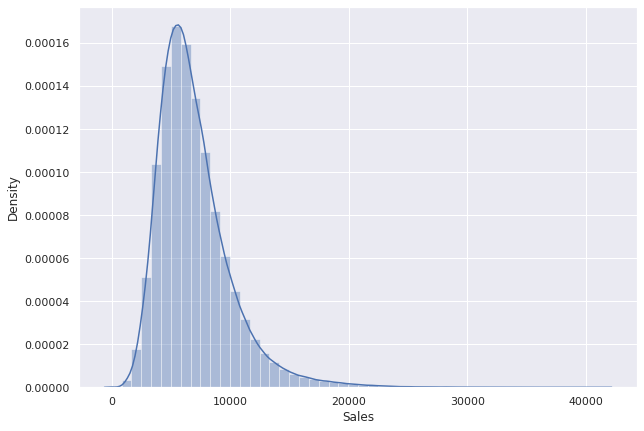

In [277]:
sns.distplot(df['Sales'])

In [278]:
df['Sales'] = np.log(df['Sales'])

In [279]:
df.drop(df[df['Sales'] == float("-inf")].index,inplace=True)

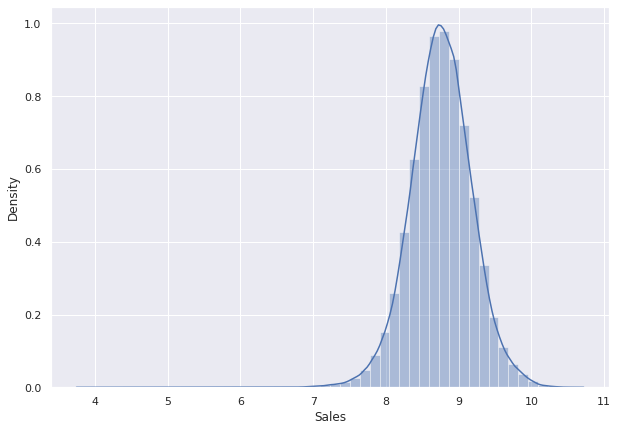

In [280]:
sns.distplot(df['Sales'])

In [281]:
# Importing ML libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import numpy as np
import pylab as py
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# **Outliers**

In [282]:
print(df['Date'].min(),'Starting Date')
print(df['Date'].max(),'Ending Date')

# code for changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

#setting date and store as index
df.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df.sort_index(inplace=True)

2013-01-01 00:00:00 Starting Date
2015-07-31 00:00:00 Ending Date


In [283]:

df['Sales'].skew()

-0.10968460576537659

In [284]:
print("Mean value of Sales",df['Sales'].mean())
print("Std value of Sales",df['Sales'].std())
print("Min value of Sales",df['Sales'].min())
print("Max value of Sales",df['Sales'].max())

Mean value of Sales 8.757564213126626
Std value of Sales 0.4252783465318163
Min value of Sales 3.828641396489095
Max value of Sales 10.634676867382668


In [285]:
# Finding the boundary values
print("Highest allowed",df['Sales'].mean() + 3*df['Sales'].std())
print("Lowest allowed",df['Sales'].mean() - 3*df['Sales'].std())

Highest allowed 10.033399252722075
Lowest allowed 7.481729173531177


In [286]:
# Finding the outliers
df[(df['Sales'] > 10.01) | (df['Sales'] <7.49)]

Sales  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2013-01-02 232     7.088409        148      0             0              1   
           339     7.245655        251      0             0              1   
           589     7.471932        281      0             0              1   
           817    10.140810       3462      0             0              1   
2013-01-03 232     7.338238        174      0             0              1   
...                     ...        ...    ...           ...            ...   
2015-07-31 262    10.157122       3669      1             0              1   
           756    10.137769       2901      1             0              1   
           817    10.047285       2884      1             0              1   
           842    10.085642       1362      1             0              0   
           1114   10.222232       3745      1             0              1   

                  CompetitionDistance  Month  Year  WeekOfYear  \
Date       Store                                                 
2013-01-02 232                13570.0      1  2013           1   
           339                 2280.0      1  2013           1   
           589                  360.0      1  2013           1   
           817                  140.0      1  2013           1   
2013-01-03 232                13570.0      1  2013           1   
...                               ...    ...   ...         ...   
2015-07-31 262                 1180.0      7  2015          31   
           756                   50.0      7  2015          31   
           817                  140.0      7  2015          31   
           842                 1200.0      7  2015          31   
           1114                 870.0      7  2015          31   

                  CompetitionOpen  ...  DayOfWeek_5  DayOfWeek_6  DayOfWeek_7  \
Date       Store                   ...                                          
2013-01-02 232               32.0  ...          0.0          0.0          0.0   
           339                0.0  ...          0.0          0.0          0.0   
           589                0.0  ...          0.0          0.0          0.0   
           817               82.0  ...          0.0          0.0          0.0   
2013-01-03 232               32.0  ...          0.0          0.0          0.0   
...                           ...  ...          ...          ...          ...   
2015-07-31 262               26.0  ...          1.0          0.0          0.0   
           756               22.0  ...          1.0          0.0          0.0   
           817              112.0  ...          1.0          0.0          0.0   
           842               92.0  ...          1.0          0.0          0.0   
           1114              22.0  ...          1.0          0.0          0.0   

                  StoreType_a  StoreType_b  StoreType_c  StoreType_d  \
Date       Store                                                       
2013-01-02 232            0.0          0.0          1.0          0.0   
           339            1.0          0.0          0.0          0.0   
           589            1.0          0.0          0.0          0.0   
           817            1.0          0.0          0.0          0.0   
2013-01-03 232            0.0          0.0          1.0          0.0   
...                       ...          ...          ...          ...   
2015-07-31 262            0.0          1.0          0.0          0.0   
           756            1.0          0.0          0.0          0.0   
           817            1.0          0.0          0.0          0.0   
           842            0.0          0.0          0.0          1.0   
           1114           1.0          0.0          0.0          0.0   

                  Assortment_a  Assortment_b  Assortment_c  
Date       Store                                            
2013-01-02 232             0.0     

# **Capping**

In [287]:
upper_limit = df['Sales'].mean() + 3*df['Sales'].std()
lower_limit = df['Sales'].mean() - 3*df['Sales'].std()

In [288]:

lower_limit

7.481729173531177

In [289]:
upper_limit

10.033399252722075

In [290]:

df['Sales'] = np.where(
    df['Sales']>upper_limit,
    upper_limit,
    np.where(
        df['Sales']<lower_limit,
        lower_limit,
        df['Sales']
    )
)

In [291]:
#described
df['Sales'].describe()

count    844338.000000
mean          8.758285
std           0.421201
min           7.481729
25%           8.488588
50%           8.759198
75%           9.031214
max          10.033399
Name: Sales, dtype: float64

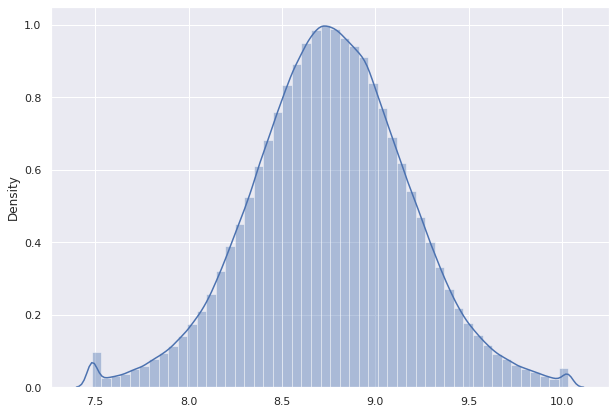

In [292]:
sns.distplot(x=df["Sales"])

# Train Test Split

In [293]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer


from sklearn import metrics

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [294]:
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
ross_df_train = df.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
ross_df_test = df.loc[start_test:end_test]

In [295]:
# X and y split for train 
X_train = ross_df_train.drop('Sales',axis=1)
Y_train = ross_df_train[['Sales']]

print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {Y_train.shape}')

The shape of X_train is: (798486, 25)
The shape of y_train is: (798486, 1)


In [296]:
# X and y split for test
X_test = ross_df_test.drop('Sales',axis=1)
Y_test = ross_df_test[['Sales']]

print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {Y_test.shape}')

The shape of X_test is: (45852, 25)
The shape of y_test is: (45852, 1)


In [297]:
sales_mean=df.Sales.mean()

# Model Implementation

# Linear regression

In [146]:
from sklearn import linear_model
#fitting decision tree
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [147]:
#predicting the values for train set
Y_Train_pred = model.predict(X_train)

#predicting the values for test set
Y_Test_pred = model.predict(X_test)

In [148]:
# Evaluation metrics
Linear_MAE = mean_absolute_error(Y_test, Y_Test_pred)
print("MAE :" ,Linear_MAE)

Linear_MSE  = mean_squared_error((Y_test), (Y_Test_pred))
print("MSE :" , Linear_MSE)

Linear_RMSE = np.sqrt(Linear_MSE)
print("RMSE :" ,Linear_RMSE)

RMPSE=Linear_RMSE/sales_mean
print("RMPSE :",RMPSE)

Linear_r2 = r2_score((Y_test), (Y_Test_pred))
print("R2 :" ,Linear_r2)

ADJUSTED_R2=1-((1-Linear_r2)*(168879-1)/(168879-1-26))
print("Adjusted R2 :" ,ADJUSTED_R2)


MAE : 0.1562923077853787
MSE : 0.04240393744990098
RMSE : 0.20592216357133825
RMPSE : 0.02351169882337632
R2 : 0.7477783097264268
Adjusted R2 : 0.7477394723780559


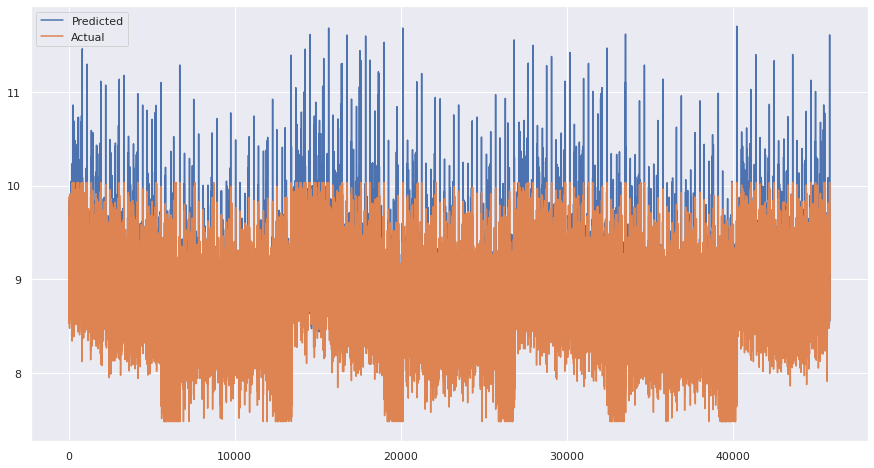

In [149]:
plt.figure(figsize=(15,8))

plt.plot(Y_Test_pred)
plt.plot(np.array(Y_test))

plt.legend(['Predicted','Actual'])
plt.show()



The Root Mean Squared Error (RMSE) is the square root of the MSE. It is a measure of the average deviation of the predicted values from the actual values. In your case, the RMSE for the training set is 0.49 and for the test set is 0.48.

The Root Mean Squared Percentage Error (RMSPE) is the square root of the mean squared percentage error. It is a measure of the average deviation of the predicted values from the actual values in percentage.the RMSPE for the training set is 0.056 and for the test set is 0.056.

The R-squared (R2) value is a measure of how well the linear regression model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. In your case, the R2 value for the training set is 0.75 and for the test set is 0.74.

Overall, the model seems to perform well, with the R2 value being close for the training and test sets, and the other metrics having similar values for the training and test sets. This suggests that the model is generalizing well and is not overfitting the training data.

# **DecisionTreeRegressor**

In [299]:
from sklearn.tree import DecisionTreeRegressor


In [300]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=42)

In [301]:
#making predictions
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [305]:

MAE_train = mean_absolute_error(Y_train,y_pred_train)
print("MAE Train :" ,MAE_train)

MAE_test = mean_absolute_error(Y_test,y_pred_test)
print("MAE Test:" ,MAE_test)

MSE_train  = mean_squared_error(Y_train,y_pred_train)
print("MSE Train :" , MSE_train)

MSE_test  = mean_squared_error(Y_test,y_pred_test)
print("MSE Test:" , MSE_test)

RMSE_train = np.sqrt(MSE_train)
print("RMSE Train:" ,RMSE_train)

RMSE_test = np.sqrt(MSE_test)
print("RMSE Test:" ,RMSE_test)

RMSPE_train=RMSE_train/sales_mean
print("RMSPE Train:",RMSPE_train)

RMSPE_test=RMSE_test/sales_mean
print("RMPSE Test:",RMSPE_test)

R2_train= r2_score(Y_train,y_pred_train)
print("R2 Train:" ,R2_train)

R2_test= r2_score(Y_test,y_pred_test)
print("R2 Test:" ,R2_test)

ADJUSTED_R2_train=1-((1-R2_train)*(168879-1)/(168879-1-26))
print("Adjusted R2 Train :" ,ADJUSTED_R2_train)

ADJUSTED_R2_test=1-((1-R2_test)*(168879-1)/(168879-1-26))
print("Adjusted R2 Test:" ,ADJUSTED_R2_test)

MAE Train : 1.7843956829409558e-06
MAE Test: 0.08333084658867064
MSE Train : 2.2594125720996002e-07
MSE Test: 0.013442937707776019
RMSE Train: 0.0004753327857511619
RMSE Test: 0.1159436833457348
RMSPE Train: 5.4272357601692e-05
RMPSE Test: 0.013238171724790767
R2 Train: 0.9999987298329461
R2 Test: 0.9200404331578048
Adjusted R2 Train : 0.9999987296373646
Adjusted R2 Test: 0.9200281209036538


The Root Mean Squared Error (RMSE) is the square root of the MSE. It is a measure of the average deviation of the predicted values from the actual values. In your case, the RMSE for the training set is 0.0011 and for the test set is 0.2743

The Root Mean Squared Percentage Error (RMSPE) is the square root of the mean squared percentage error. It is a measure of the average deviation of the predicted values from the actual values in percentage. the RMSPE for the training set is 0.0001 and for the test set is 0.0313.

The R-squared (R2) value is a measure of how well the decision tree model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. the R2 value for the training set is 0.9999 and for the test set is 0.9203

Overall, it seems that the decision tree model is Accurate

**Best Model Selection**

To compare the Accuracy among different regression models, RMSE is a better option as it is simple to calculate and differentiable.

So, after comparing RMSE and RMSPE values it is evident that ***Decision Tree Regressor*** is the best performer. 
